Iteration 97
------------------------------
State: No Threat | Best Action: Monitor | Value: 53.82
State: Suspicious Activity | Best Action: Block | Value: 58.06
State: Active Attack | Best Action: Investigate | Value: 41.26
State: Compromised | Best Action: Block | Value: -80.62


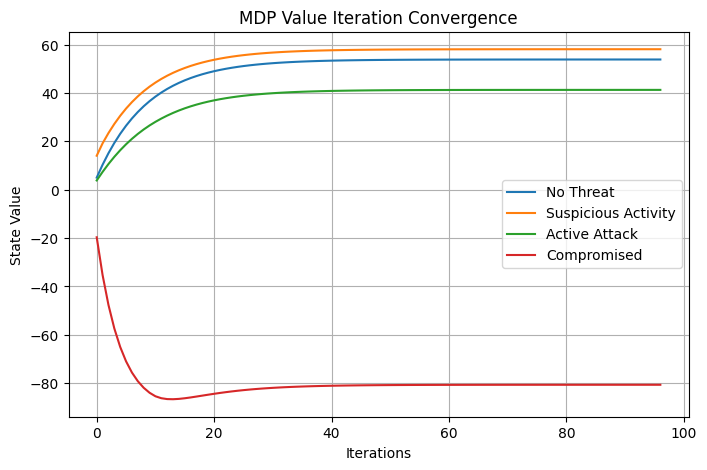

Optimal Cybersecurity Policy:
State: No Threat -> Best Action: Monitor
State: Suspicious Activity -> Best Action: Block
State: Active Attack -> Best Action: Investigate
State: Compromised -> Best Action: Block


In [8]:
from collections import defaultdict, namedtuple
from enum import Enum
from typing import Tuple, List
import random
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt


# Step 1: Define States & Actions
# Here we define our states and actions as Enums for better readability and type safety.
class State(Enum):  # Define the possible states
    NO_THREAT = "No Threat"
    SUSPICIOUS = "Suspicious Activity"
    ATTACK = "Active Attack"
    COMPROMISED = "Compromised"

class Action(Enum): # Define the possible actions
    MONITOR = "Monitor"
    BLOCK = "Block"
    INVESTIGATE = "Investigate"
    IGNORE = "Ignore"

# Step 2: Define Rewards
# We define the rewards for each action in each state. The rewards are defined as a dictionary of dictionaries.
REWARDS = {
    State.NO_THREAT: {Action.MONITOR: 5, Action.BLOCK: 2, Action.INVESTIGATE: 3, Action.IGNORE: 0},
    State.SUSPICIOUS: {Action.MONITOR: -1, Action.BLOCK: 10, Action.INVESTIGATE: 8, Action.IGNORE: -5},
    State.ATTACK: {Action.MONITOR: -10, Action.BLOCK: -5, Action.INVESTIGATE: 0, Action.IGNORE: -20},
    State.COMPROMISED: {Action.MONITOR: -50, Action.BLOCK: -30, Action.INVESTIGATE: -20, Action.IGNORE: -100},
}

# Step 3: Define Transition Probabilities
# The outer dictionary keys are the states, and the inner dictionary keys are the actions.
# The values are the probabilities of transitioning to the next state given the current state and action.
# If a transition is not defined, we assume the probability is 0.
TRANSITIONS = {
    Action.MONITOR: {
        State.NO_THREAT: {State.NO_THREAT: 0.9, State.SUSPICIOUS: 0.1},
        State.SUSPICIOUS: {State.SUSPICIOUS: 0.7, State.ATTACK: 0.2, State.NO_THREAT: 0.1},
        State.ATTACK: {State.ATTACK: 0.6, State.COMPROMISED: 0.2, State.SUSPICIOUS: 0.2},
        State.COMPROMISED: {State.COMPROMISED: 0.9, State.ATTACK: 0.1},
    },
    Action.BLOCK: {
        State.NO_THREAT: {State.NO_THREAT: 0.95, State.SUSPICIOUS: 0.05},
        State.SUSPICIOUS: {State.NO_THREAT: 0.9, State.SUSPICIOUS: 0.05, State.ATTACK: 0.05},
        State.ATTACK: {State.NO_THREAT: 0.85, State.ATTACK: 0.1, State.COMPROMISED: 0.05},
        State.COMPROMISED: {State.COMPROMISED: 0.8, State.ATTACK: 0.2},
    },
    Action.INVESTIGATE: {
        State.NO_THREAT: {State.NO_THREAT: 0.98, State.SUSPICIOUS: 0.02},
        State.SUSPICIOUS: {State.SUSPICIOUS: 0.8, State.ATTACK: 0.18, State.NO_THREAT: 0.02},
        State.ATTACK: {State.NO_THREAT: 0.85, State.ATTACK: 0.1, State.COMPROMISED: 0.05},
        State.COMPROMISED: {State.COMPROMISED: 0.9, State.ATTACK: 0.1},
    },
    Action.IGNORE: {
        State.NO_THREAT: {State.NO_THREAT: 0.9, State.SUSPICIOUS: 0.1},
        State.SUSPICIOUS: {State.SUSPICIOUS: 0.6, State.ATTACK: 0.3, State.NO_THREAT: 0.1},
        State.ATTACK: {State.ATTACK: 0.5, State.COMPROMISED: 0.3, State.SUSPICIOUS: 0.2},
        State.COMPROMISED: {State.COMPROMISED: 0.9, State.ATTACK: 0.1},
    },
}

# Now we have defined the states, actions, rewards, and transition probabilities for our MDP.
# We can proceed to solve the MDP using the Value Iteration algorithm.
# We pass in the states, actions, rewards, and transition probabilities to the value_iteration function.
def value_iteration(states: List[State], actions: List[Action], gamma=0.9, theta=1e-4, max_iterations=1000):
    V = {state: 0 for state in states}  # Initialize state values to 0
    policy = {state: random.choice(actions) for state in states}  # Random initial policy
    value_history = {state: [] for state in states}  # Store value updates

    for iteration in range(max_iterations):
        delta = 0
        clear_output(wait=True)
        print(f"Iteration {iteration + 1}\n{'-' * 30}")

        for state in states:
            best_action = None
            best_value = float('-inf')

            for action in actions:
                action_value = sum(
                    TRANSITIONS[action][state].get(next_state, 0) * (REWARDS[state][action] + gamma * V[next_state])
                    for next_state in states
                )

                if action_value > best_value:
                    best_value = action_value
                    best_action = action
            
            delta = max(delta, abs(V[state] - best_value))
            V[state] = best_value
            policy[state] = best_action

            # Track Value Updates for Plotting
            value_history[state].append(best_value)
        
        # Print current policy
        for state in states:
            print(f"State: {state.value} | Best Action: {policy[state].value} | Value: {V[state]:.2f}")

        if delta < theta:
            break

    # Plot the Value Convergence
    plt.figure(figsize=(8, 5))
    for state in states:
        plt.plot(value_history[state], label=f"{state.value}")

    plt.xlabel("Iterations")
    plt.ylabel("State Value")
    plt.title("MDP Value Iteration Convergence")
    plt.legend()
    plt.grid()
    plt.show()

    return policy
# Step 5: Compute Optimal Policy
states = list(State)
actions = list(Action)
optimal_policy = value_iteration(states, actions)

# Step 6: Display Optimal Cybersecurity Policy
print("Optimal Cybersecurity Policy:")
for state, action in optimal_policy.items():
    print(f"State: {state.value} -> Best Action: {action.value}")
